# K-means Clustering for Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Train sets
x_train = pd.read_csv('./Datasets/x_train.csv')
y_train = pd.read_csv('./Datasets/y_train.csv')

# Validation sets
x_valid = pd.read_csv('./Datasets/x_valid.csv')
y_valid = pd.read_csv('./Datasets/y_valid.csv')

# Test sets
x_test = pd.read_csv('./Datasets/x_test.csv')
y_test = pd.read_csv('./Datasets/y_test.csv')


In [3]:
# Confirm that the length is correct
print("Length of x_train:", x_train.shape)
print("Length of x_valid:", x_valid.shape)
print("Length of x_test:", x_test.shape)
print("Length of y_train:", y_train.shape)
print("Length of y_valid:", y_valid.shape)
print("Length of y_test:", y_test.shape)
total_length = x_train.shape[0] + x_valid.shape[0] + x_test.shape[0]
print("Train test split ratio", x_train.shape[0] / total_length, x_valid.shape[0] / total_length, x_test.shape[0] / total_length)
print("Fraud ratio:", y_train[y_train['fraud_bool'] == 1].count() / (y_train[y_train['fraud_bool'] == 0].count() + y_train[y_train['fraud_bool'] == 1].count()))


Length of x_train: (38601, 20)
Length of x_valid: (8272, 20)
Length of x_test: (8272, 20)
Length of y_train: (38601, 1)
Length of y_valid: (8272, 1)
Length of y_test: (8272, 1)
Train test split ratio 0.6999909329948318 0.1500045335025841 0.1500045335025841
Fraud ratio: fraud_bool    0.199995
dtype: float64


In [4]:
x_train.head()


,device_os_windows,income_0.9,customer_age_60,keep_alive_session,has_other_cards,housing_status_BE,device_os_other,customer_age_50,housing_status_BC,customer_age_20,phone_home_valid,payment_type_AC,housing_status_BB,employment_status_CC,credit_risk_score,proposed_credit_limit,date_of_birth_distinct_emails_4w,name_email_similarity,current_address_months_count,log_device_distinct_emails_8w
0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0.330769,0.005236,0.194444,0.247106,0.344059,0.693147
1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0.538462,0.162304,0.333333,0.087147,0.032178,0.405465
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.519231,0.162304,0.527778,0.104738,0.212871,0.405465
3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0.423077,0.005236,0.388889,0.197178,0.069307,0.405465
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0.359615,0.005236,0.138889,0.412427,0.146040,0.405465


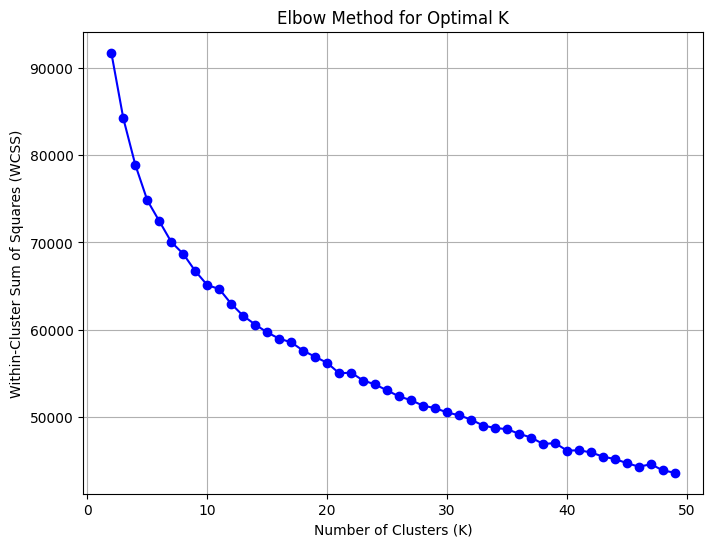

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

dist_df = [] 
k_range = range(2, 50)

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train) 
    dist_df.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, dist_df, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()


Due to the absence of a clear elbow point in the K-means clustering analysis, which makes it challenging to determine the optimal number of clusters, and considering that we have a labeled dataset, we have decided not to use K-means. In addition, K-means is an unsupervised learning algorithm, and our objective is to leverage the labeled data for a supervised learning task, which is better suited for classification or regression with known target labels. Therefore, we will proceed with supervised machine learning methods for our analysis.